# Exemplo de análise de sentimentos usando o SVM (aprendizagem de máquina)

## Pacotes utilizados

* __spaCy__: biblioteca de software para processamento avançado de linguagem natural;
* __TfidfVectorizer__: medida utilizada para determinar o peso de uma palavra de um documento em uma coleção de documentos;
* __svm__: representa o método de aprendizagem supervisionada usada para a classificação dos tweets;
* __classification_report__: pacote/módulo que gera um relatório em texto mostrando as principais métricas do classificador;
* __model_selection__: contém funções para seleção de dados e classes para validação cruzada.

In [1]:
# IMPORTANDO PACOTES

import pandas as pd
import numpy as np
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report
import sklearn.model_selection as model_selection
import warnings
warnings.filterwarnings('ignore')

nlp = spacy.load("pt_core_news_lg")

In [2]:
# LENDO ARQUIVO JSON COM OS TWEETS

dados = pd.read_json(r'example_dataset_with_vader_polarities.json')
dados.head()

,id_tweet,nome,nome_conta,data_criacao,texto,texto_limpo,polaridade_vader
0,1552601236809158656,Neymar Jr,neymarjr,1659003955000,@gabriel1medina Gosto de vc assim 😂😂,Gosto de vc assim 😂😂,Positivo
1,1551860014301827072,Neymar Jr,neymarjr,1658827234000,Toda ação provava uma reação … \nFala o que qu...,Toda ação provava uma reação … Fala o que quer...,Negativo
2,1551859906189328384,Neymar Jr,neymarjr,1658827208000,Ah pronto! Não posso contrariar uma matéria qu...,Ah pronto! Não posso contrariar uma matéria qu...,Negativo
3,1551582940219559936,Neymar Jr,neymarjr,1658761174000,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta https://t....,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta,Neutro
4,1551576735443034112,Neymar Jr,neymarjr,1658759695000,@geglobo Fantasma? 😂😂😂 ge sendo ge … tocou é p...,Fantasma? 😂😂😂 ge sendo ge … tocou é pênalti! B...,Negativo


In [3]:
len(dados)

57

In [4]:
dados["polaridade_vader"].value_counts()

Positivo    26
Negativo    16
Neutro      15
Name: polaridade_vader, dtype: int64

In [5]:
dados["polaridade_vader"].loc[dados["polaridade_vader"] == "Negativo"] = -1
dados["polaridade_vader"].loc[dados["polaridade_vader"] == "Neutro"] = 0
dados["polaridade_vader"].loc[dados["polaridade_vader"] == "Positivo"] = 1
dados.head()

,id_tweet,nome,nome_conta,data_criacao,texto,texto_limpo,polaridade_vader
0,1552601236809158656,Neymar Jr,neymarjr,1659003955000,@gabriel1medina Gosto de vc assim 😂😂,Gosto de vc assim 😂😂,1
1,1551860014301827072,Neymar Jr,neymarjr,1658827234000,Toda ação provava uma reação … \nFala o que qu...,Toda ação provava uma reação … Fala o que quer...,-1
2,1551859906189328384,Neymar Jr,neymarjr,1658827208000,Ah pronto! Não posso contrariar uma matéria qu...,Ah pronto! Não posso contrariar uma matéria qu...,-1
3,1551582940219559936,Neymar Jr,neymarjr,1658761174000,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta https://t....,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta,0
4,1551576735443034112,Neymar Jr,neymarjr,1658759695000,@geglobo Fantasma? 😂😂😂 ge sendo ge … tocou é p...,Fantasma? 😂😂😂 ge sendo ge … tocou é pênalti! B...,-1


In [6]:
X = dados['texto_limpo'] # features ou caracteristicas
y = dados['polaridade_vader'].astype('int') # resposta

# Gerando dados de treinamento e teste

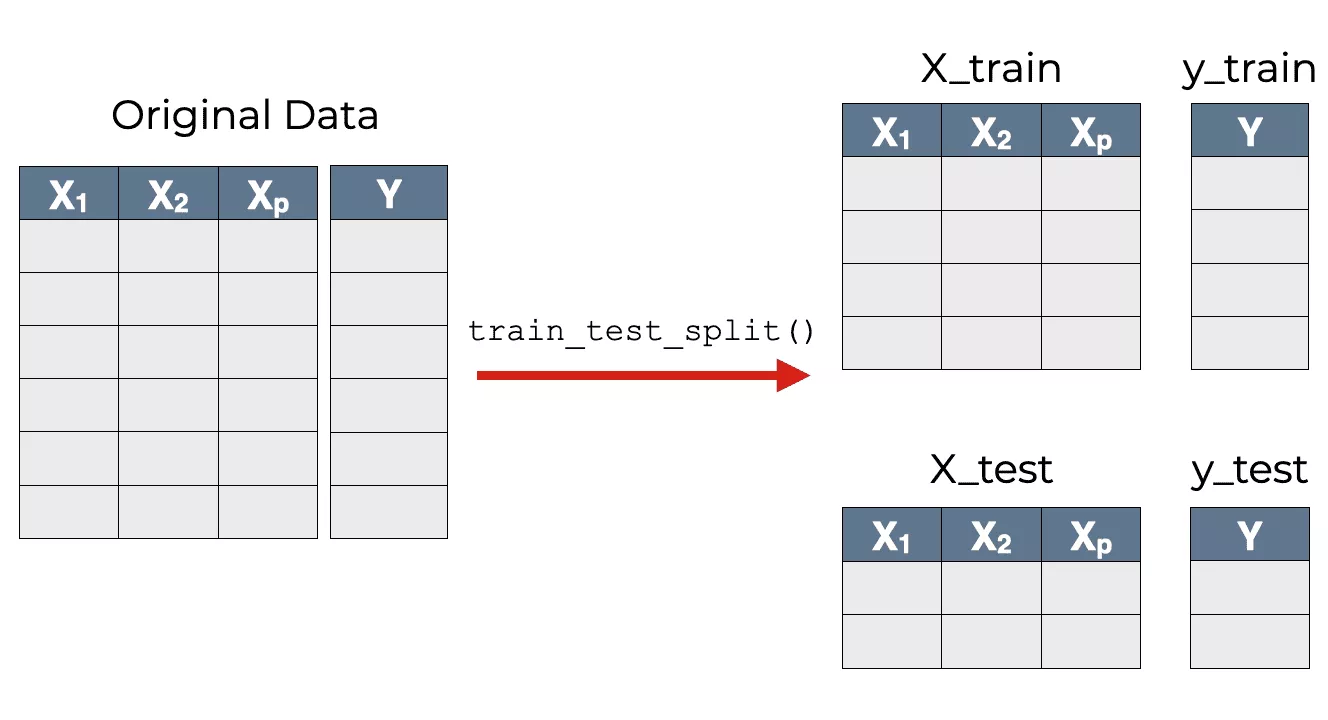

In [32]:
def gerar_dados_treinamento_teste(X, y):
    X_treino, X_teste, y_treino, y_teste = model_selection.train_test_split(X, y, 
                                                                            train_size=0.85, 
                                                                            test_size=0.15,
                                                                            stratify=y,
                                                                            random_state=42)
    return (X_treino, X_teste, y_treino, y_teste)

In [8]:
(X_treino, X_teste, y_treino, y_teste) = gerar_dados_treinamento_teste(X, y)

print("X_treino:", len(X_treino))
print("y_treino:", len(y_treino))
print("X_teste:", len(X_teste))
print("y_teste:", len(y_teste))

X_treino: 48
y_treino: 48
X_teste: 9
y_teste: 9


In [9]:
def criar_vetor_tfidf(X_treino, X_teste):
    # criando vetores IF-IDF
    vectorizer = TfidfVectorizer(min_df = 0.05, # ignorar palavras que aparecem em menos de 5% das postagens
                                 max_df = 0.8) # ignorar palavras que aparecem em mais de 80% das postagens

    vetor_treinamento = vectorizer.fit_transform(X_treino)
    vetor_teste = vectorizer.transform(X_teste)
    return (vetor_treinamento, vetor_teste)

# TfidfVectorizer

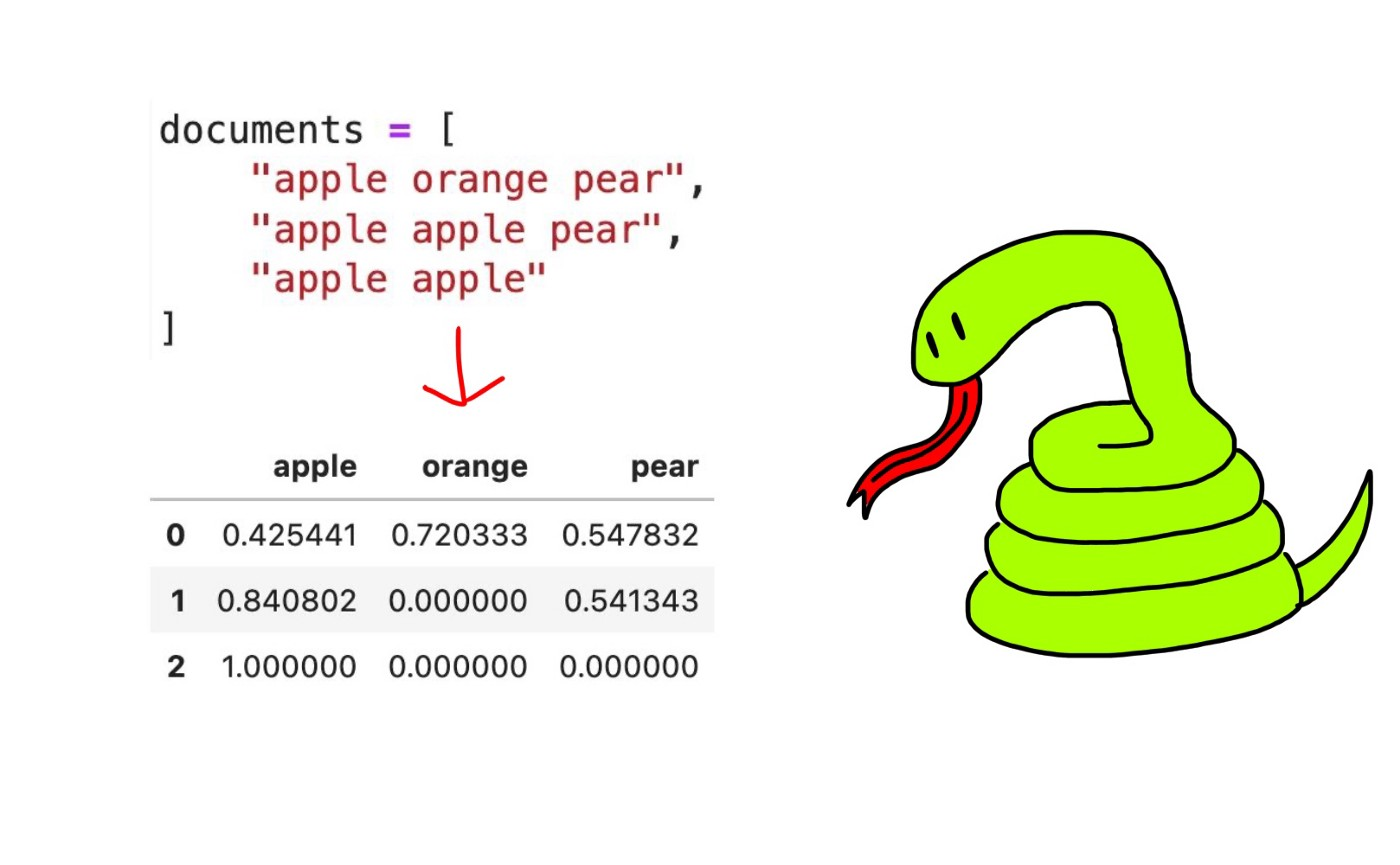

# Support Vector Machines (SVM)


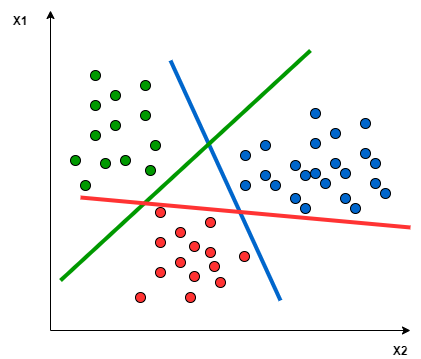

In [10]:
(vetor_treinamento, vetor_teste) = criar_vetor_tfidf(X_treino, X_teste)

In [13]:
def treinar_modelo(vetor_treinamento, y_treino):
    # realiza classificacao com SVM, kernel linear
    modelo = svm.SVC(kernel='linear')
    modelo.fit(vetor_treinamento, y_treino)
    
    return modelo

In [14]:
def testar_modelo(modelo, vetor_teste, y_teste, resultado_em_dict):
    predicoes = modelo.predict(vetor_teste)

    # results
    return classification_report(y_teste, predicoes, output_dict=resultado_em_dict)

In [15]:
modelo = treinar_modelo(vetor_treinamento, y_treino)
resultado = testar_modelo(modelo, vetor_teste, y_teste, False)

print(resultado)

              precision    recall  f1-score   support

          -1       0.50      1.00      0.67         3
           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.67         9
weighted avg       0.83      0.67      0.67         9



# Matriz confusão


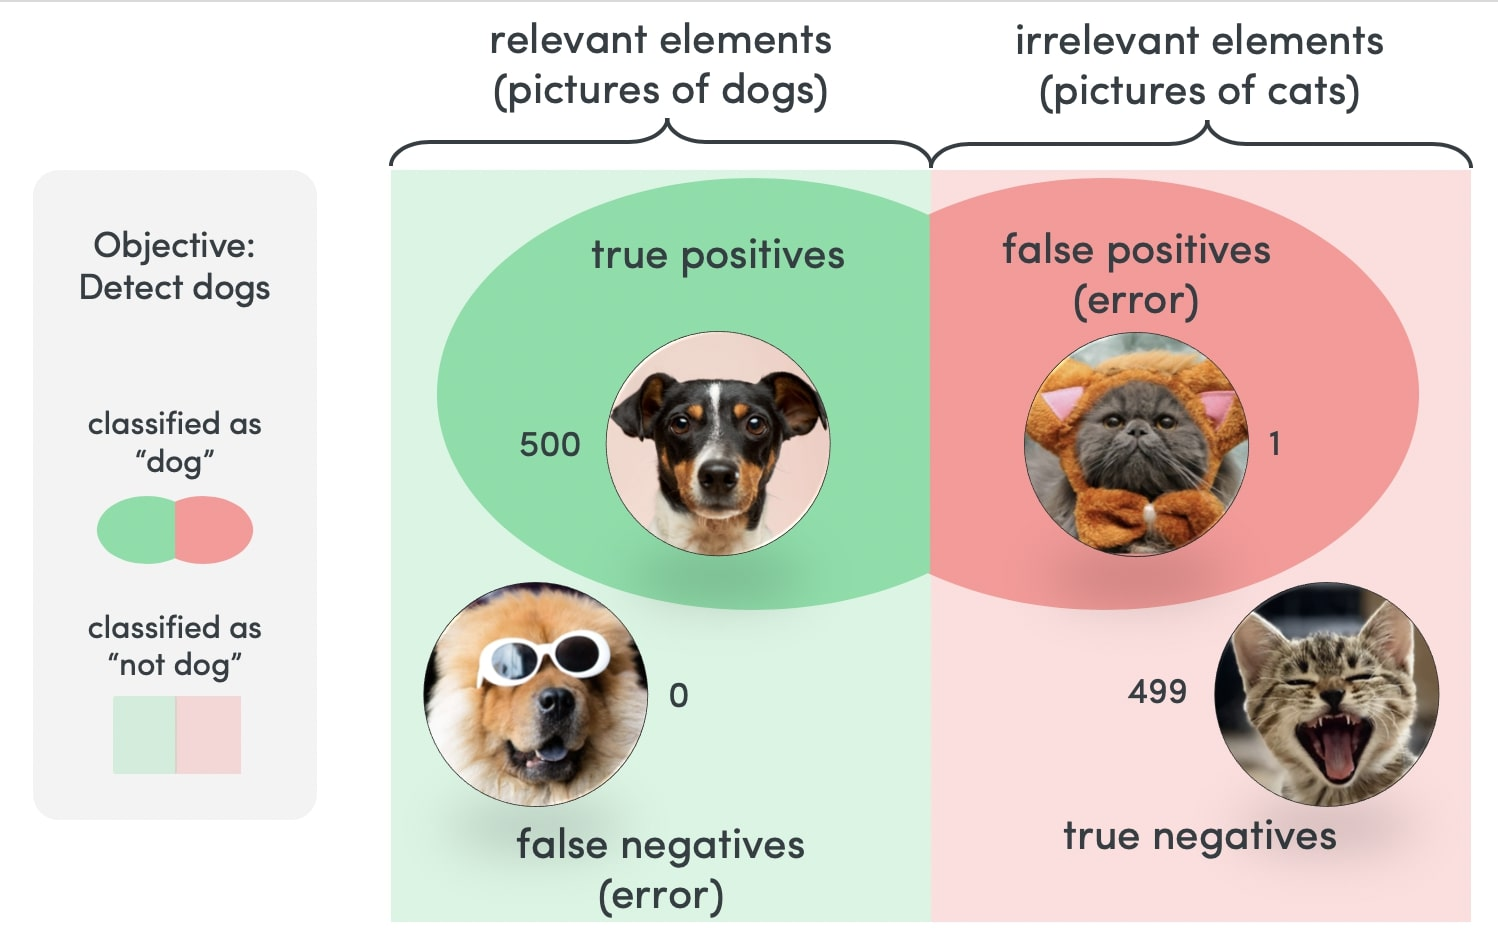

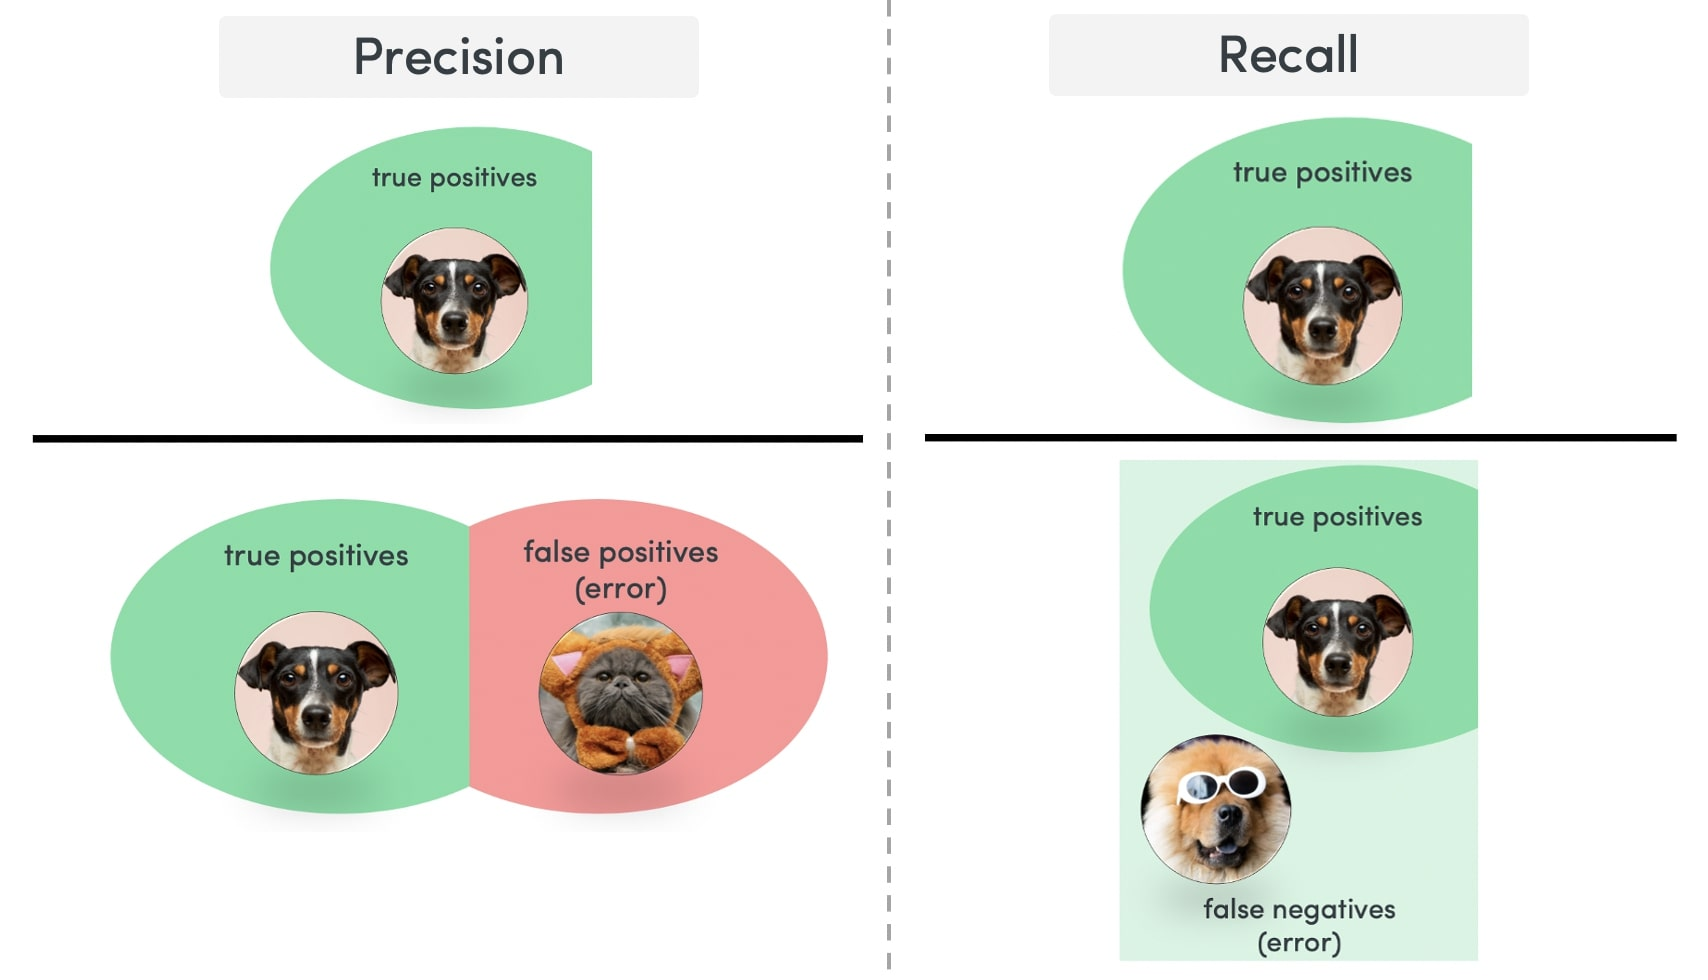

## Fórmulas

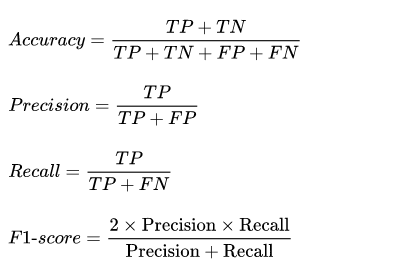

# Removendo palavras irrelevantes; fazendo lematização

## Pacote utilizado

* __NLTK (Natural Language Toolkit)__: pacote/módulo que é uma "caixa de ferramentas" para linguagem natural, contendo vários algoritmos voltados para o processamento de linguagem natural. Desenvolvido para uso acadêmico.

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation

In [18]:
dados.iloc[8]['texto_limpo']

'Gosto muito do Diniz como treinador, uma pena que no Br não dão tempo suficiente.'

In [19]:
# transformando o texto para caixa baixa
dados['texto_limpo'] = [texto.lower() for texto in dados['texto_limpo']]

In [20]:
dados.iloc[8]['texto_limpo']

'gosto muito do diniz como treinador, uma pena que no br não dão tempo suficiente.'

In [21]:
# remove stopwords e pontuacoes
def remover_stopwords(tweet_text):
    # identificando as hashtags
    hashtags = [word[0:] for word in tweet_text.split() if word[0] == '#']
    
    # removendo as hashtags do texto
    tweet_text = tweet_text.replace(" ".join(hashtags), "")

    stop_words = stopwords.words('portuguese')
    stop_words.remove("não")
    word_tokens = word_tokenize(tweet_text)

    palavras = [palavra for palavra in word_tokens if palavra not in stop_words and palavra not in punctuation]
    
    resultado = " ".join(palavras)

    # adicionando as hashtags novamente no texto
    resultado = resultado + " " + " ".join(hashtags)
    return resultado

In [22]:
novo_texto = remover_stopwords(dados.iloc[8]['texto_limpo'])
novo_texto

'gosto diniz treinador pena br não dão tempo suficiente '

## Lematização

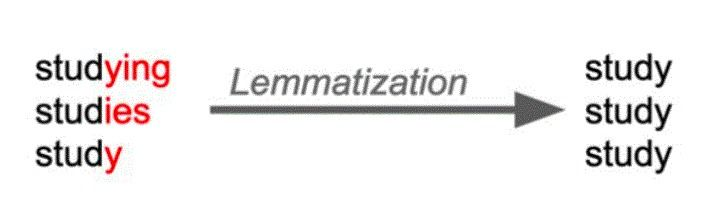

In [23]:
# reduz as palavras à suas raizes
def lemmatizar_texto(tweet_text):
    lemma = ""

    # identificando hashtags do texto
    hashtags = [word[0:] for word in tweet_text.split() if word[0] == '#']

    # removendo hashtags do texto
    tweet_text = tweet_text.replace(" ".join(hashtags), "")

    for token in nlp(tweet_text):
        lemma += token.lemma_ + " "

    resultado = "".join(lemma)
    # adicionando as hashtags novamente no texto
    resultado = resultado + " ".join(hashtags)
    return resultado

In [24]:
novo_texto = lemmatizar_texto(novo_texto)
novo_texto

'gostar diniz treinador peno br não dar tempo suficiente '

In [25]:
dados['texto_sem_stopwords'] = np.vectorize(remover_stopwords)(dados['texto_limpo'])
dados.head()

,id_tweet,nome,nome_conta,data_criacao,texto,texto_limpo,polaridade_vader,texto_sem_stopwords
0,1552601236809158656,Neymar Jr,neymarjr,1659003955000,@gabriel1medina Gosto de vc assim 😂😂,gosto de vc assim 😂😂,1,gosto vc assim 😂😂
1,1551860014301827072,Neymar Jr,neymarjr,1658827234000,Toda ação provava uma reação … \nFala o que qu...,toda ação provava uma reação … fala o que quer...,-1,toda ação provava reação … fala quer escuta nã...
2,1551859906189328384,Neymar Jr,neymarjr,1658827208000,Ah pronto! Não posso contrariar uma matéria qu...,ah pronto! não posso contrariar uma matéria qu...,-1,ah pronto não posso contrariar matéria falando...
3,1551582940219559936,Neymar Jr,neymarjr,1658761174000,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta https://t....,meu sobrenome 😂🤷🏽‍♂️ atura ou surta,0,sobrenome 😂🤷🏽‍♂️ atura surta
4,1551576735443034112,Neymar Jr,neymarjr,1658759695000,@geglobo Fantasma? 😂😂😂 ge sendo ge … tocou é p...,fantasma? 😂😂😂 ge sendo ge … tocou é pênalti! b...,-1,fantasma 😂😂😂 ge sendo ge … tocou pênalti bando...


In [26]:
dados['texto_lemmatizado'] = np.vectorize(lemmatizar_texto)(dados['texto_sem_stopwords'])

In [27]:
dados.head()

,id_tweet,nome,nome_conta,data_criacao,texto,texto_limpo,polaridade_vader,texto_sem_stopwords,texto_lemmatizado
0,1552601236809158656,Neymar Jr,neymarjr,1659003955000,@gabriel1medina Gosto de vc assim 😂😂,gosto de vc assim 😂😂,1,gosto vc assim 😂😂,gostar vc assim 😂 😂
1,1551860014301827072,Neymar Jr,neymarjr,1658827234000,Toda ação provava uma reação … \nFala o que qu...,toda ação provava uma reação … fala o que quer...,-1,toda ação provava reação … fala quer escuta nã...,todo ação provar reação … falir querer escutar...
2,1551859906189328384,Neymar Jr,neymarjr,1658827208000,Ah pronto! Não posso contrariar uma matéria qu...,ah pronto! não posso contrariar uma matéria qu...,-1,ah pronto não posso contrariar matéria falando...,ah pronto não poder contrariar matéria falar b...
3,1551582940219559936,Neymar Jr,neymarjr,1658761174000,Meu sobrenome 😂🤷🏽‍♂️ atura ou surta https://t....,meu sobrenome 😂🤷🏽‍♂️ atura ou surta,0,sobrenome 😂🤷🏽‍♂️ atura surta,sobrenome 😂 🤷 🏽‍ ♂ ️ aturar surto
4,1551576735443034112,Neymar Jr,neymarjr,1658759695000,@geglobo Fantasma? 😂😂😂 ge sendo ge … tocou é p...,fantasma? 😂😂😂 ge sendo ge … tocou é pênalti! b...,-1,fantasma 😂😂😂 ge sendo ge … tocou pênalti bando...,fantasma 😂 😂 😂 ge ser ge … tocar pênalti banda...


In [28]:
X = dados['texto_lemmatizado']
y = dados['polaridade_vader'].astype('int')

In [40]:
(X_treino, X_teste, y_treino, y_teste) = gerar_dados_treinamento_teste(X, y)
(vetor_treinamento, vetor_teste) = criar_vetor_tfidf(X_treino, X_teste)
modelo = treinar_modelo(vetor_treinamento, y_treino)
resultado = testar_modelo(modelo, vetor_teste, y_teste, False)

print(resultado)

              precision    recall  f1-score   support

          -1       1.00      0.67      0.80         3
           0       0.40      1.00      0.57         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         9
   macro avg       0.80      0.72      0.68         9
weighted avg       0.87      0.67      0.69         9



# Validação cruzada

## Pacote utilizado

* __StratifiedKFold__: pacote/módulo que fornece índices de treinamento/teste para dividir os dados em conjuntos de treinamento/teste, mantendo a estratificação.

# KFold

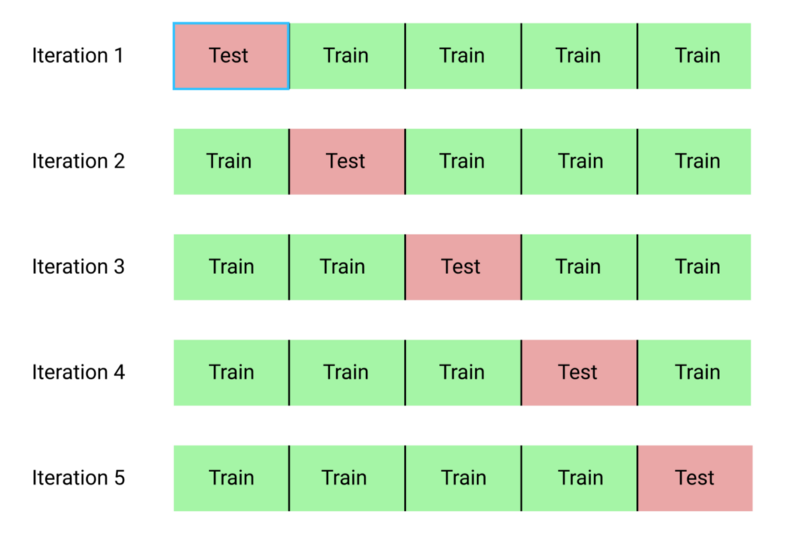

# StratifiedKFold


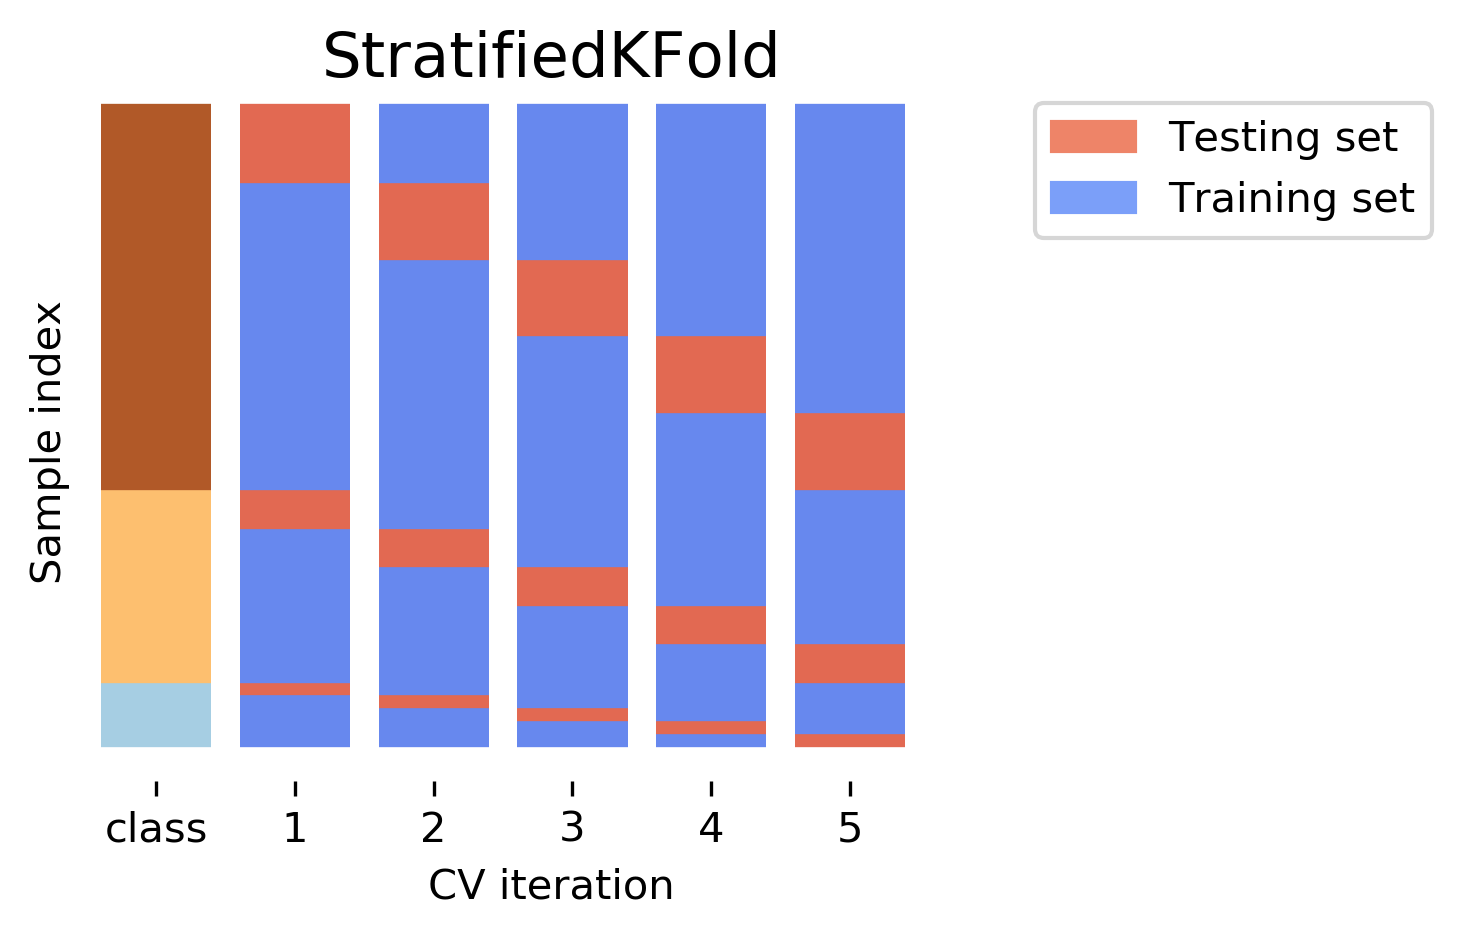

In [41]:
from sklearn.model_selection import StratifiedKFold

In [42]:
X = dados['texto_lemmatizado']
y = dados['polaridade_vader'].astype('int')

In [44]:
skfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

In [45]:
colunas = [
    'Precisao Negativo',
    'Recall Negativo',
    'F1-Score Negativo',
    'Suporte Negativo',
    'Precisao Neutro',
    'Recall Neutro',
    'F1-Score Neutro',
    'Suporte Neutro',
    'Precisao Positivo',
    'Recall Positivo',
    'F1-Score Positivo',
    'Suporte Positivo',
    'Acuracia']

df_resultado_teste_kfold = pd.DataFrame(columns=colunas)

linhas = []

for indice_treino, indice_teste in skfold.split(X, y):
    X_treino, X_teste = X[indice_treino], X[indice_teste]
    y_treino, y_teste = y[indice_treino], y[indice_teste]
    
    (vetor_treinamento, vetor_teste) = criar_vetor_tfidf(X_treino, X_teste)
    modelo = treinar_modelo(vetor_treinamento, y_treino)
    resultado = testar_modelo(modelo, vetor_teste, y_teste, True)
        
    linhas.append([
        resultado['-1']['precision'],
        resultado['-1']['recall'],
        resultado['-1']['f1-score'],
        resultado['-1']['support'],
        resultado['0']['precision'],
        resultado['0']['recall'],
        resultado['0']['f1-score'],
        resultado['0']['support'],
        resultado['1']['precision'],
        resultado['1']['recall'],
        resultado['1']['f1-score'],
        resultado['1']['support'],
        resultado['accuracy']
    ])
    

df_resultado_teste_kfold = df_resultado_teste_kfold.append(pd.DataFrame(linhas, columns=colunas),
                                                           ignore_index=True)
df_resultado_teste_kfold

,Precisao Negativo,Recall Negativo,F1-Score Negativo,Suporte Negativo,Precisao Neutro,Recall Neutro,F1-Score Neutro,Suporte Neutro,Precisao Positivo,Recall Positivo,F1-Score Positivo,Suporte Positivo,Acuracia
0,0.250000,0.5,0.333333,2,0.666667,0.666667,0.666667,3,1.000000,0.50,0.666667,4,0.555556
1,0.500000,0.5,0.500000,2,0.200000,0.500000,0.285714,2,1.000000,0.25,0.400000,4,0.375000
2,0.500000,1.0,0.666667,2,0.500000,0.500000,0.500000,2,1.000000,0.50,0.666667,4,0.625000
3,1.000000,0.5,0.666667,2,1.000000,0.500000,0.666667,2,0.666667,1.00,0.800000,4,0.750000
4,0.333333,0.5,0.400000,2,0.000000,0.000000,0.000000,2,0.333333,0.25,0.285714,4,0.250000
5,1.000000,1.0,1.000000,3,1.000000,1.000000,1.000000,2,1.000000,1.00,1.000000,3,1.000000
6,0.000000,0.0,0.000000,3,0.500000,0.500000,0.500000,2,0.600000,1.00,0.750000,3,0.500000


In [46]:
df_resultado_teste_kfold.describe()

,Precisao Negativo,Recall Negativo,F1-Score Negativo,Precisao Neutro,Recall Neutro,F1-Score Neutro,Precisao Positivo,Recall Positivo,F1-Score Positivo,Acuracia
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.511905,0.571429,0.509524,0.552381,0.523810,0.517007,0.800000,0.642857,0.652721,0.579365
std,0.374007,0.345033,0.314298,0.376070,0.295468,0.316083,0.269430,0.349319,0.241767,0.246727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.250000,0.285714,0.250000
25%,0.291667,0.500000,0.366667,0.350000,0.500000,0.392857,0.633333,0.375000,0.533333,0.437500
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.666667,0.555556
75%,0.750000,0.750000,0.666667,0.833333,0.583333,0.666667,1.000000,1.000000,0.775000,0.687500
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
